# Unemployment in India during COVID analysis using python : 

## Importing important libraries and dataset : 

In [21]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer

In [74]:
data = pd.read_csv(r"Unemployment in India.csv")

In [75]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Data Preprocessing : 

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [77]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

## Filling missing values with mean : 

In [78]:
si = SimpleImputer(strategy='mean')

In [79]:
data.select_dtypes(include = 'float').columns

Index([' Estimated Unemployment Rate (%)', ' Estimated Employed',
       ' Estimated Labour Participation Rate (%)'],
      dtype='object')

In [80]:
ar = si.fit_transform(data[[' Estimated Unemployment Rate (%)', ' Estimated Employed',
       ' Estimated Labour Participation Rate (%)']])

In [81]:
data[[' Estimated Unemployment Rate (%)', ' Estimated Employed',' Estimated Labour Participation Rate (%)']] = round(pd.DataFrame(ar,columns=data.select_dtypes(include = 'float').columns))

In [82]:
data.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)             0
 Estimated Employed                          0
 Estimated Labour Participation Rate (%)     0
Area                                        28
dtype: int64

## Filling missing values with mode (most frequent word) : 

In [83]:
data.select_dtypes(include = 'object').columns

Index(['Region', ' Date', ' Frequency', 'Area'], dtype='object')

In [84]:
si = SimpleImputer(strategy='most_frequent')

In [85]:
ar = si.fit_transform(data[['Region', ' Date', ' Frequency', 'Area']])
data[['Region', ' Date', ' Frequency', 'Area']] = pd.DataFrame(ar,columns=data.select_dtypes(include = 'object').columns)

In [86]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,4.0,11999139.0,43.0,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.0,11755881.0,42.0,Rural
2,Andhra Pradesh,31-07-2019,Monthly,4.0,12086707.0,44.0,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.0,12285693.0,44.0,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.0,12256762.0,45.0,Rural
...,...,...,...,...,...,...,...
763,Andhra Pradesh,30-11-2019,Monthly,12.0,7204460.0,43.0,Urban
764,Andhra Pradesh,30-11-2019,Monthly,12.0,7204460.0,43.0,Urban
765,Andhra Pradesh,30-11-2019,Monthly,12.0,7204460.0,43.0,Urban
766,Andhra Pradesh,30-11-2019,Monthly,12.0,7204460.0,43.0,Urban


In [87]:
data.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

## Checking Duplicate Values : 

In [88]:
data.duplicated().sum()

27

In [89]:
data.drop_duplicates(inplace = True)

In [90]:
data.duplicated().sum()

0

# Exploratory Data Analysis (EDA) : 

In [91]:
data.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,4.0,11999139.0,43.0,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.0,11755881.0,42.0,Rural
2,Andhra Pradesh,31-07-2019,Monthly,4.0,12086707.0,44.0,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.0,12285693.0,44.0,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.0,12256762.0,45.0,Rural


In [92]:
round(data.describe())

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,741.0,741.0,741.0
mean,12.0,7204460.0,43.0
std,11.0,8082522.0,8.0
min,0.0,49420.0,13.0
25%,5.0,1192616.0,38.0
50%,8.0,4745178.0,41.0
75%,16.0,11265828.0,45.0
max,77.0,45777509.0,73.0


In [93]:
data[[' Estimated Unemployment Rate (%)', ' Estimated Employed',' Estimated Labour Participation Rate (%)']].corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.224711,0.001700
Estimated Employed,-0.224711,1.000000,0.011857
Estimated Labour Participation Rate (%),0.001700,0.011857,1.000000


In [129]:
data['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [130]:
average_unemployment_by_region = data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()
average_unemployment_by_region

Region
Meghalaya            4.777778
Odisha               5.607143
Assam                6.307692
Uttarakhand          6.629630
Karnataka            6.642857
Gujarat              6.714286
Sikkim               7.294118
Madhya Pradesh       7.321429
Maharashtra          7.571429
Telangana            7.642857
Andhra Pradesh       7.689655
West Bengal          8.178571
Goa                  9.250000
Chhattisgarh         9.250000
Tamil Nadu           9.285714
Kerala              10.142857
Puducherry          10.269231
Punjab              12.142857
Uttar Pradesh       12.464286
Rajasthan           14.035714
Chandigarh          15.916667
Jammu & Kashmir     16.190476
Delhi               16.500000
Himachal Pradesh    18.535714
Bihar               18.821429
Jharkhand           20.535714
Haryana             26.250000
Tripura             28.392857
Name:  Estimated Unemployment Rate (%), dtype: float64

In [131]:
data['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

In [132]:
average_unemployment_by_area = data.groupby('Area')[' Estimated Unemployment Rate (%)'].mean()
average_unemployment_by_area

Area
Rural    10.314763
Urban    13.154450
Name:  Estimated Unemployment Rate (%), dtype: float64

## KPIs are : 
* **Estimated Unemployment Rate (%):**
   * The percentage of the labor force that is unemployed and actively seeking employment.
   * This is a direct indicator of the health of the job market.
   
   
   
* **Estimated Employed:**

   * The total number of individuals who are employed.  
   * This KPI helps in understanding the overall employment level in the region.



* **Estimated Labour Participation Rate (%):**

   * The percentage of the working-age population that is either employed or actively seeking employment.
   * This KPI indicates the level of engagement of the working-age population in the labor market.
   
* **Area :** 
   
   * Analyzing differences in unemployment and labor participation rates between rural and urban areas.
   * This can provide insights into how different areas are affected by economic changes.

# Unemployment Rate Over Time : 

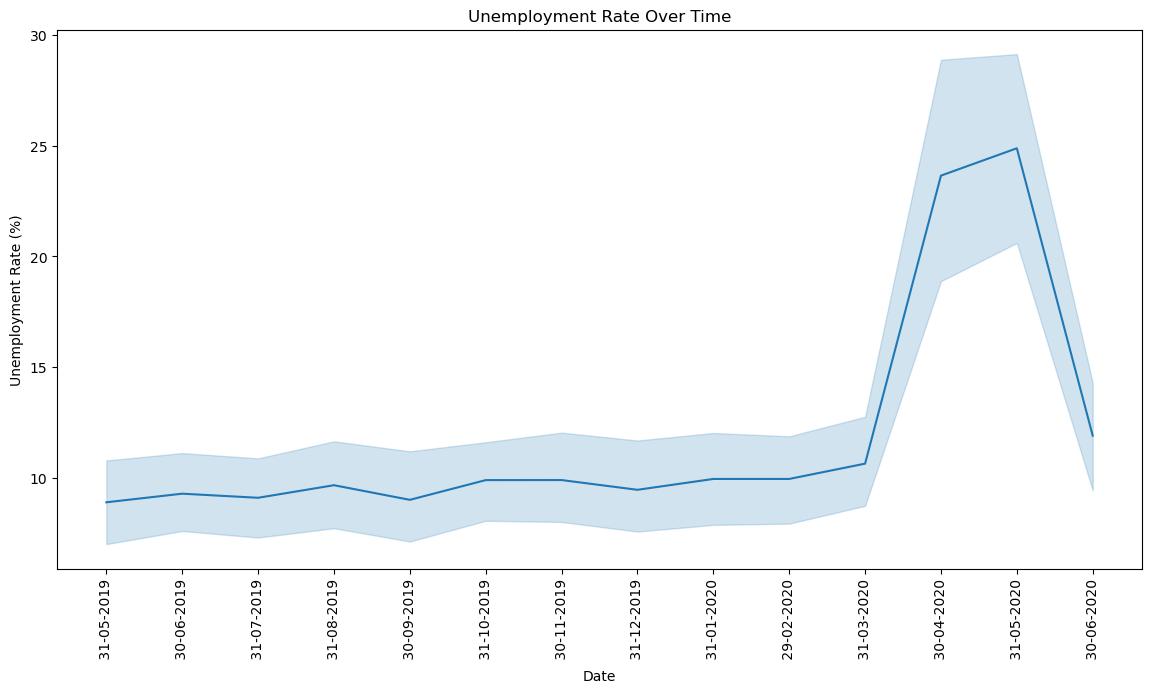

In [106]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x=' Date', y=' Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation = 90)
plt.show()

# Plot Unemployment Rate by Region : 

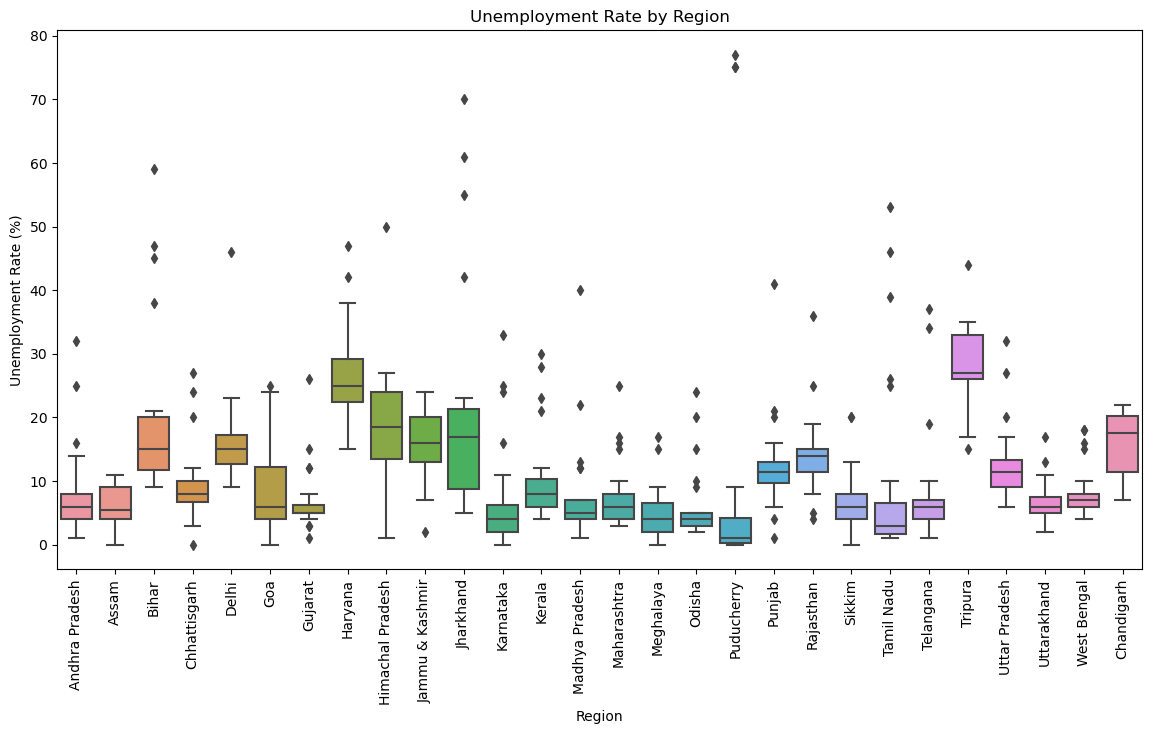

In [109]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Region', y=' Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# Plot relationship between Unemployment Rate and Labour Participation Rate : 

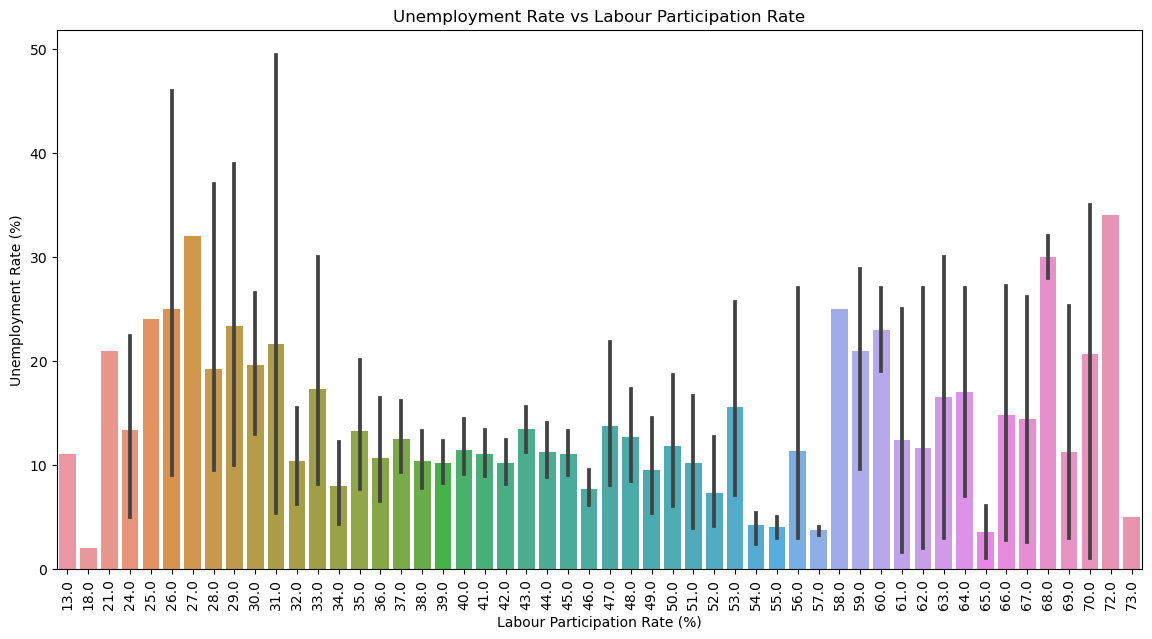

In [113]:
plt.figure(figsize=(14, 7))
sns.barplot(data=data, x=' Estimated Labour Participation Rate (%)', y=' Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate vs Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation = 90)
plt.show()

# Unemployment Rate by Area (Rural vs Urban) : 

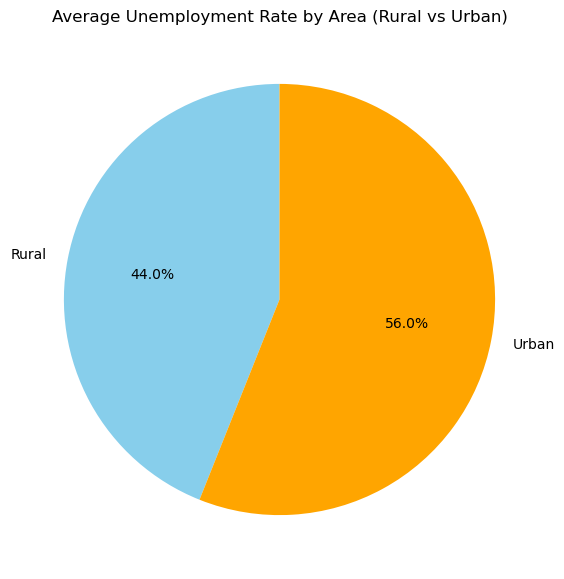

In [128]:
plt.figure(figsize=(10, 7))
average_unemployment_by_area.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Average Unemployment Rate by Area (Rural vs Urban)')
plt.ylabel('')
plt.show()

# Average Unemployment Rate by Region : 

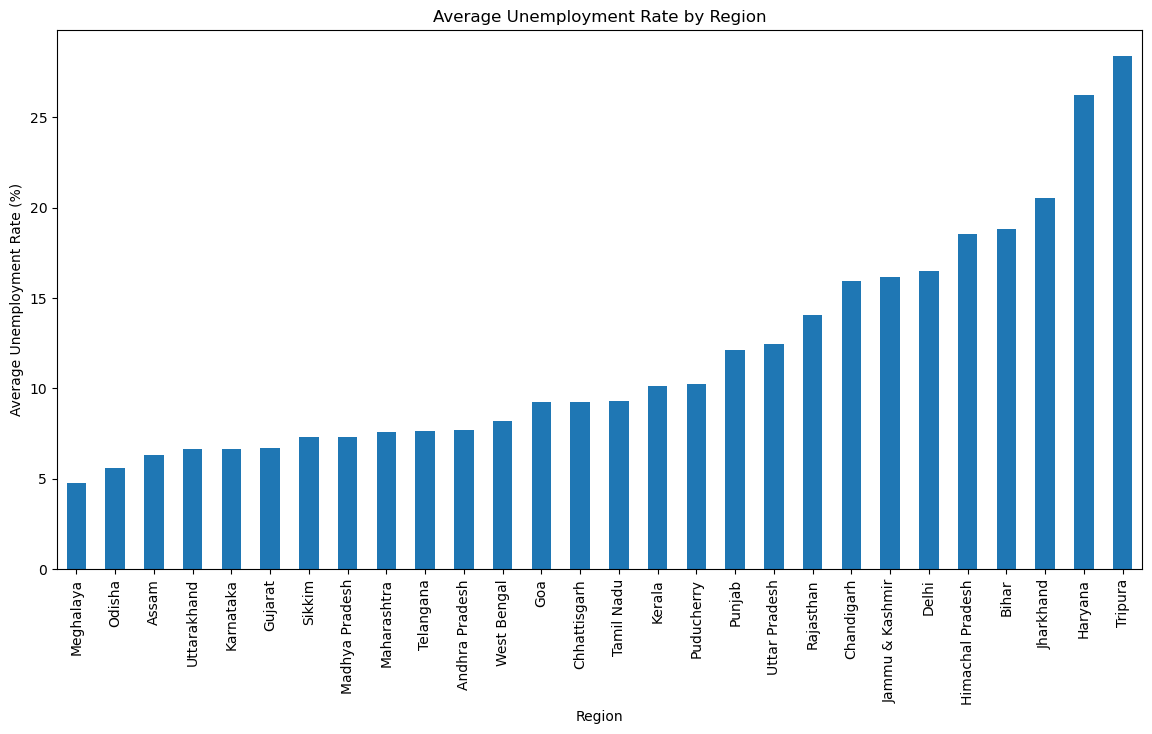

In [120]:
plt.figure(figsize=(14, 7))
average_unemployment_by_region.plot(kind='bar')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()